In [206]:
import numpy as np
import torch 
import pandas as pd
import itertools
import init_params
import compute_prob
import init_model
import time
import helper
import main_sim
import importlib 
import params_search as ps
import seaborn as sns

import cProfile as profile
import pstats




importlib.reload(helper)
importlib.reload(compute_prob)
importlib.reload(init_params)
importlib.reload(init_model)
importlib.reload(main_sim)
importlib.reload(ps)


<module 'params_search' from '/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/params_search.py'>

In [183]:
stimuli = init_model.granch_stimuli(1, "BBBBBD")
stimuli.get_stimuli_sequence("embedding_PCA.csv")
stimuli.stimuli_sequence

b


{0: tensor([-2.5911], dtype=torch.float64),
 1: tensor([-2.5911], dtype=torch.float64),
 2: tensor([-2.5911], dtype=torch.float64),
 3: tensor([-2.5911], dtype=torch.float64),
 4: tensor([-2.5911], dtype=torch.float64),
 5: tensor([3.4376], dtype=torch.float64)}

In [184]:

grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[10],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[10],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[10],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[10])

priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], epsilons = [0.000001], 
mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
params_search_space = ps.set_parameter_search(grid_params, priors)



#print(all_ps_res)

In [207]:
def timing_ps(run = 3): 
    all_times = {}
    for i in range(2, run): 
       print(i)
       start_time = time.perf_counter()
       grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[i],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[i],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[i],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[i])
       priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], epsilons = [0.000001], mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
       params_search_space = ps.set_parameter_search(grid_params, priors)
       all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
       end_time = time.perf_counter()
       all_times[i] = (end_time - start_time)
    return all_times


improved_timing = timing_ps(3)


2
tensor([[-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.0000e-03,  1.0000e-03],
        [-5.0000e+00,  1.0000e-03,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [-5.0000e+00,  1.8000e+00,  1.0000e-03],
        [-5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.0000e-03,  1.0000e-03],
        [ 5.0000e+00,  1.0000e-03,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00],
        [ 5.0000e+00,  1.8000e+00,  1.0000e-03],
        [ 5.0000e+00,  1.8000e+00,  1.8000e+00]])
tensor([-5.8029e+06,  1.1843e+00, -1.0762e+08, -5.0000e+07, -5.8029e+06,
        -6.3112e+00, -5.7624e+07, -3.7738e+01, -5.5803e+07, -5.0000e+07,
        -5.7624e+07, -1.4810e+01, -5.8029e+06, -2.1743e+01, -5.7624

/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:162: RuntimeWarning: divide by zero encountered in log


{2: 0.03837212300277315, 3: 0.006573303995537572, 4: 0.009412598999915645, 5: 0.007304232000024058, 6: 0.007445088995154947, 7: 0.012469053006498143, 8: 0.013875720993382856}


In [90]:
improved_timing = timing_ps(8)


/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


??
??
??
??
??
??


/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


In [152]:
print(original_timing)
print(improved_timing)

for key in original_timing: 
    original_timing[key] = original_timing[key][0]
    #improved_timing[key] = [improved_timing[key]]


{2: [[0.06572134401358198]], 3: [[0.1047258909966331]], 4: [[4.112841604990535]], 5: [[17.15497194600175]], 6: [[35.44621212199854]], 7: [[38.20980644100928]], 8: [[100.7750528750039]], 9: [[216.15652060198772]], 10: [[313.9627694750088]], 11: [[450.1318304059969]]}
{2: [0.06141555099748075], 3: [0.07876502300496213], 4: [8.392592474003322], 5: [9.98885952901037], 6: [17.58159386899206], 7: [32.07952056299837], 8: [59.86218607999035], 9: [108.06429452900193], 10: [166.485814544998], 11: [253.18549823699868]}


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/847355892.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cb_df = o_df.append(n_df)


<AxesSubplot:xlabel='grid_step', ylabel='t'>

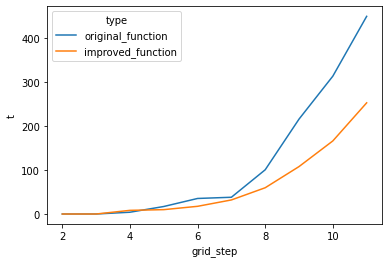

In [165]:
o_df = pd.DataFrame.from_dict(original_timing, orient = "index")
o_df["t"] = o_df[0]
o_df["type"] = "original_function"

n_df = pd.DataFrame.from_dict(improved_timing, orient = "index")
n_df["t"] = n_df[0]
n_df["type"] = "improved_function"

cb_df = o_df.append(n_df)
cb_df.index.name = 'grid_step'
cb_df.reset_index(inplace=True)
cb_df
#pd.DataFrame(improved_timing)

sns.lineplot(x='grid_step', y='t', hue='type', 
             data=cb_df)

In [92]:

prof = profile.Profile()
prof.enable()

all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
prof.disable()

stats = pstats.Stats(prof).strip_dirs().sort_stats("cumtime")
stats.print_stats() # top 10 rows

??
         2384 function calls (2361 primitive calls) in 0.035 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000    0.035    0.018 interactiveshell.py:3362(run_code)
        2    0.000    0.000    0.035    0.018 {built-in method builtins.exec}
        1    0.000    0.000    0.035    0.035 1070387720.py:1(<cell line: 4>)
        1    0.000    0.000    0.035    0.035 params_search.py:13(run_parameter_search)
        1    0.000    0.000    0.034    0.034 params_search.py:16(run_model_with_parameter)
        1    0.000    0.000    0.026    0.026 init_params.py:114(add_priors)
      2/1    0.000    0.000    0.026    0.026 _jit_internal.py:413(fn)
        1    0.000    0.000    0.026    0.026 functional.py:845(_return_output)
        1    0.000    0.000    0.026    0.026 functional.py:688(_unique_impl)
        1    0.026    0.026    0.026    0.026 {built-in method unique_dim}
        1    0.000    0.0

/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


<AxesSubplot:xlabel='stimulus_id'>

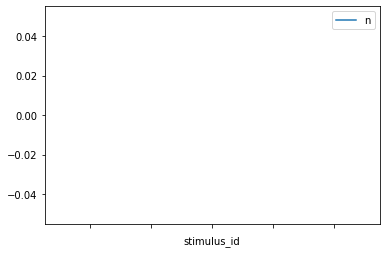

In [93]:


sample_df = all_ps_res[0][0].groupby(['stimulus_id'], as_index=False).count()
sample_df["stimulus_id"] = sample_df["stimulus_id"]+1
sample_df["n"] = sample_df["EIG"]

sample_df.plot.line(x = "stimulus_id", y = "n")


In [178]:
def timing_ps(run = 3): 
    all_sims_res = pd.DataFrame()
    for i in range(2, run): 
       print(i)
       grid_params = ps.set_granch_grid_parameter(grid_mu_theta_starts = [-5],grid_mu_theta_ends = [5],grid_mu_theta_steps=[i],
                                grid_sig_sq_starts=[0.001],grid_sig_sq_ends=[1.8],grid_sig_sq_steps=[i],
                                grid_y_starts=[-5],grid_y_ends=[5],grid_y_steps=[i],
                                grid_epsilon_starts=[0.001],grid_epsilon_ends=[1.8],grid_epsilon_steps=[i])
       priors = ps.set_granch_priors(mu_priors = [0.001], V_priors = [0.001], alpha_priors = [1], beta_priors = [1], epsilons = [0.000001], mu_epsilons = [0.001], sd_epsilons = [4], eigs = [0.0001])
       params_search_space = ps.set_parameter_search(grid_params, priors)
       all_ps_res = ps.run_parameter_search(params_search_space, stimuli)
       ps_res = all_ps_res[0][0]
       ps_res["grid_step"] = i 
       all_sims_res = all_sims_res.append(ps_res)
    return all_sims_res




improved_timing = timing_ps(8)
improved_timing.index.name = 't'
improved_timing.reset_index(inplace=True)


2
3
4


/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  
/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14:

5


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


6


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:152: RuntimeWarning: divide by zero encountered in log
  


7


/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_8943/2600719051.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_sims_res = all_sims_res.append(ps_res)


In [97]:

grid_mu_steps = [2,5,11,20,50,100]
time = list(map(lambda x: x[1], all_ps_res))

res = pd.DataFrame({
    "grid_mu_step": grid_mu_steps,
    "time": time
})

res.plot.line(x = "grid_mu_step", y = "time")


ValueError: All arrays must be of the same length

<AxesSubplot:xlabel='t', ylabel='EIG'>

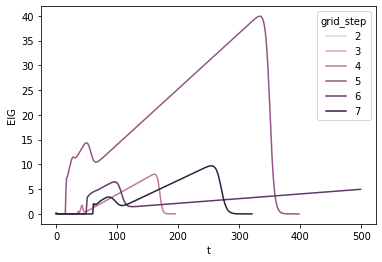

In [179]:
sns.lineplot(x='t', y='EIG', hue='grid_step', 
             data=improved_timing)

In [ ]:
def run_everything():
  start_time = time.perf_counter()
  p = init_params.granch_params(
      grid_mu_theta = torch.linspace(start = -1, end = 1, steps = 11),
      grid_sig_sq = torch.linspace(start = 0.001, end = 1.8, steps = 10), 
      grid_y = torch.linspace(start = -1, end = 1, steps = 11), 
      grid_epsilon =  torch.linspace(start = 0.001, end = 1.8, steps = 10), 
      hypothetical_obs_grid_n = 3, 
      mu_prior = 0.001,
      V_prior = 0.001, 
      alpha_prior = 1, 
      beta_prior = 1,
      epsilon  = 0.000001, 
      mu_epsilon = torch.tensor([0.001]), 
      sd_epsilon = torch.tensor([4]), 
      world_EIGs = 0.0001,
      max_observation = 500)
  p.add_meshed_grid()
  p.add_lp_mu_sig_sq()
  p.add_y_given_mu_sig_sq()
  p.add_lp_epsilon()
  p.add_priors()
  s = init_model.granch_stimuli(1, 'BBBBBB')
  m = init_model.granch_model(500, s)
  res = main_sim.granch_main_simulation(p, m, s)
  end_time = time.perf_counter()
  return(end_time - start_time)



timing = [] 
for x in range(50):
  t = run_everything()
  timing.append(t)



/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:151: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res
/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py:151: RuntimeWarning: divide by zero encountered in log
  return np.log(res) if log else res


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_83870/1363847840.py", line 33, in <cell line: 32>
    t = run_everything()
  File "/var/folders/1y/l17j6svd6jq5_j5s7s92yh8m0000gn/T/ipykernel_83870/1363847840.py", line 25, in run_everything
    res = main_sim.granch_main_simulation(p, m, s)
  File "/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/main_sim.py", line 83, in granch_main_simulation
    model.ps_likelihood = compute_prob.score_likelihood(model, params, hypothetical_obs=True)
  File "/Users/caoanjie/Desktop/projects/model/model/GRANCH_python/compute_prob.py", line 107, in score_likelihood
    likelihood = helper.group_by_logsumexp(grouping_base, lp_z_given_mu_sig_sq_for_y)
  File "/Users/caoanjie/Desktop/projects/mode

<AxesSubplot:xlabel='sim_id'>

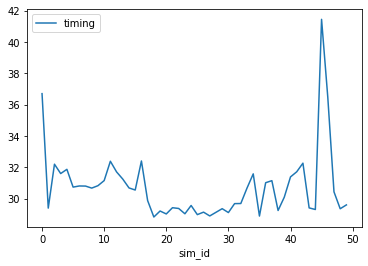

In [ ]:
t_df = pd.DataFrame({"timing": timing})
t_df.index.name = 'sim_id'
t_df.reset_index(inplace=True)

t_df.plot.line(x = "sim_id", y = "timing")